# DAY -26

   Project_ID  Building_Height  Material_Quality_Index  Labor_Cost  \
0           1        21.854305                       9   70.213332   
1           2        47.782144                       9  142.413614   
2           3        37.939727                       3  110.539985   
3           4        31.939632                       6  250.784939   
4           5        12.020839                       7  167.575159   

   Concrete_Strength  Foundation_Depth  Weather_Index  Construction_Cost  
0          45.326394          8.804790              4        2400.287931  
1          47.900505          6.727632              6        3705.461312  
2          22.112484          8.208544              8        2653.631004  
3          26.267562          7.094515              4        2534.099466  
4          40.134306          6.160303              6        1741.179333  
Simple Linear Regression R-squared: 0.9251224612323216
Simple Linear Regression MSE: 42990.64782261945
Multiple Linear Regression

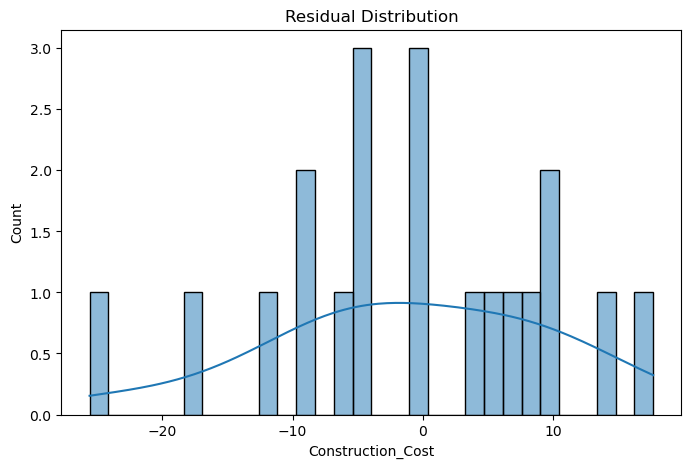

Identified Outliers:
Empty DataFrame
Columns: [Project_ID, Building_Height, Material_Quality_Index, Labor_Cost, Concrete_Strength, Foundation_Depth, Weather_Index, Construction_Cost]
Index: []
Ethical Considerations: Overestimating or underestimating construction costs could lead to financial strain or safety risks.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
df = pd.read_csv("Civil_Engineering_Regression_Dataset.csv")

# Display first few rows
print(df.head())

# Check for missing values and handle them
df.fillna(df.median(numeric_only=True), inplace=True)

# Define Independent (X) and Dependent (y) variables for Simple Linear Regression
X_simple = df[['Building_Height']]
y = df['Construction_Cost']

# Split the data
X_train_simple, X_test_simple, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Train Simple Linear Regression Model
model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train)
y_pred_simple = model_simple.predict(X_test_simple)

# Model Evaluation
r2_simple = r2_score(y_test, y_pred_simple)
mse_simple = mean_squared_error(y_test, y_pred_simple)
print("Simple Linear Regression R-squared:", r2_simple)
print("Simple Linear Regression MSE:", mse_simple)

# Multiple Linear Regression
X_multiple = df[['Building_Height', 'Material_Quality_Index', 'Labor_Cost', 'Concrete_Strength', 'Foundation_Depth']]
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)
y_pred_multiple = model_multiple.predict(X_test)

r2_multiple = r2_score(y_test, y_pred_multiple)
adj_r2_multiple = 1 - (1 - r2_multiple) * (len(y) - 1) / (len(y) - X_multiple.shape[1] - 1)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)

print("Multiple Linear Regression R-squared:", r2_multiple)
print("Multiple Linear Regression Adjusted R-squared:", adj_r2_multiple)
print("Multiple Linear Regression MSE:", mse_multiple)

# Variance Inflation Factor (VIF) for Multicollinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = X_multiple.columns
vif_data["VIF"] = [variance_inflation_factor(X_multiple.values, i) for i in range(X_multiple.shape[1])]
print("Variance Inflation Factor:")
print(vif_data)

# Feature Selection using Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
selected_features = X_multiple.columns[lasso.coef_ != 0]
print("Selected Features after Lasso Regression:", selected_features)

# Residual Analysis
residuals = y_test - y_pred_multiple
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Distribution")
plt.show()

# Outlier Detection using Z-score
z_scores = np.abs((df['Construction_Cost'] - df['Construction_Cost'].mean()) / df['Construction_Cost'].std())
outliers = df[z_scores > 3]
print("Identified Outliers:")
print(outliers)

# Business Impact and Model Deployment Considerations
print("Ethical Considerations: Overestimating or underestimating construction costs could lead to financial strain or safety risks.")


# DAY -28

   Feature_1  Feature_2  Cluster
0  -7.726421  -8.394957        2
1   5.453396   0.742305        1
2  -2.978672   9.556846        0
3   6.042673   0.571319        1
4  -6.521840  -6.319325        2


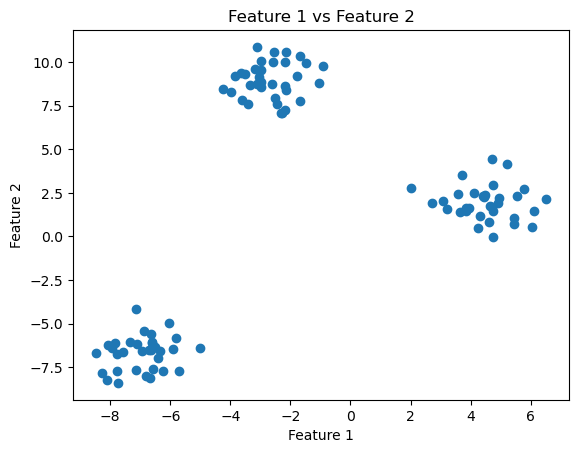

        Feature_1   Feature_2     Cluster
count  100.000000  100.000000  100.000000
mean    -1.716279    1.474851    0.990000
std      4.804275    6.505181    0.822598
min     -8.487110   -8.394957    0.000000
25%     -6.435252   -6.094340    0.000000
50%     -2.603027    1.922690    1.000000
75%      3.837695    8.313123    2.000000
max      6.526065   10.866564    2.000000


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

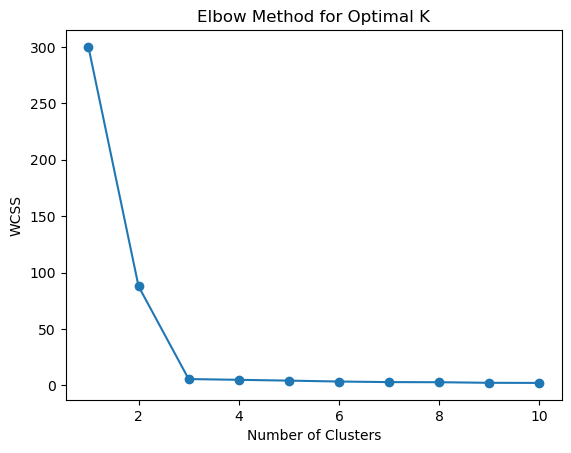

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


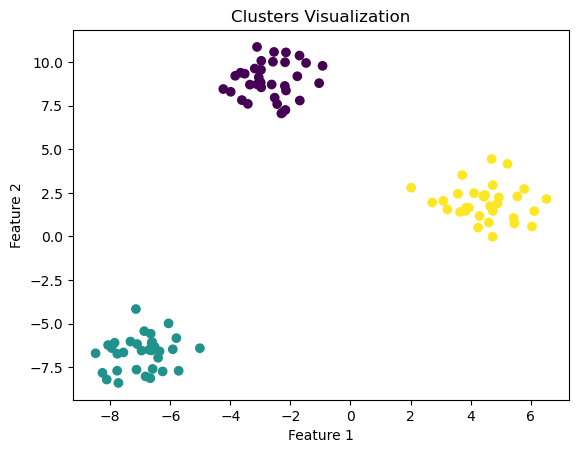

Silhouette Score: 0.8741019539803933


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


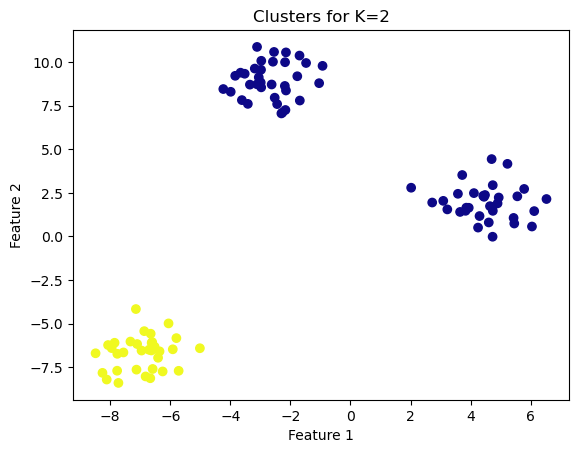

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


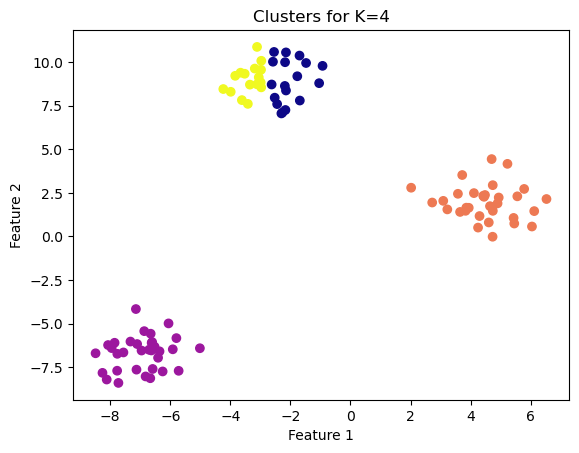

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


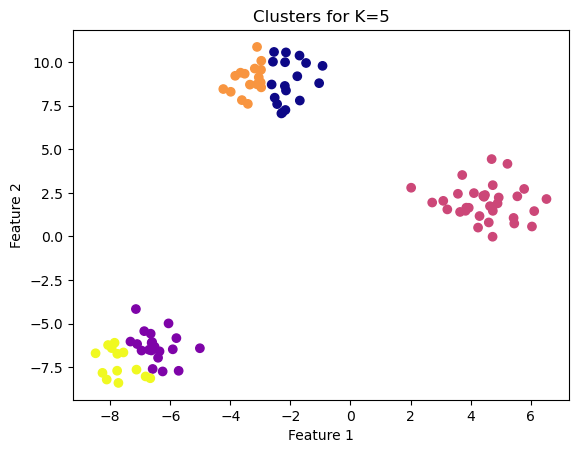

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load Dataset
df = pd.read_csv("Day_28_Clustering_Dataset.csv")  # Replace with actual dataset name
print(df.head())

# Scatter plot for visualization
plt.scatter(df['Feature_1'], df['Feature_2'])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Feature 1 vs Feature 2")
plt.show()

# Basic Statistics
print(df.describe())

# Feature Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Finding the Optimal Number of Clusters using Elbow Method
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

# Applying K-Means Clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Scatter Plot of Clusters
plt.scatter(df['Feature_1'], df['Feature_2'], c=df['Cluster'], cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Clusters Visualization")
plt.show()

# Silhouette Score
sil_score = silhouette_score(df_scaled, df['Cluster'])
print(f"Silhouette Score: {sil_score}")

# Trying Different K Values
for k in [2, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    df[f'Cluster_{k}'] = kmeans.fit_predict(df_scaled)
    plt.scatter(df['Feature_1'], df['Feature_2'], c=df[f'Cluster_{k}'], cmap='plasma')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f"Clusters for K={k}")
    plt.show()

# DAY -30

In [ ]:
import pandas as pd
from collections import Counter

# Load dataset from user input (replace 'your_dataset.csv' with the actual file name)
file_path = input("Day 30 Market_Basket_Data.csv")
df = pd.read_csv(file_path)

# Ensure column names are correct
print("Columns in the dataset:", df.columns)

# Check if the 'Items' column exists
if "Items" in df.columns:
    # Splitting items in transactions
    all_items = df["Items"].dropna().str.split(", ")

    # Flattening the list and counting item occurrences
    item_counts = Counter([item for sublist in all_items for item in sublist])

    # Convert to DataFrame for better visualization
    item_counts_df = pd.DataFrame(item_counts.items(), columns=["Item", "Count"]).sort_values(by="Count", ascending=False)

    # Display top 10 most frequently purchased items
    print("\nMost frequently purchased items:")
    print(item_counts_df.head(10))
else:
    print("Error: 'Items' column not found in the dataset.")
